In [ ]:
!pip install networkx matplotlib scipy numpy sklearn python-louvain

C:\Users\zambogo\AppData\Local\Temp\ipykernel_16284\554363443.py:10: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 62 nodes and 159 edges


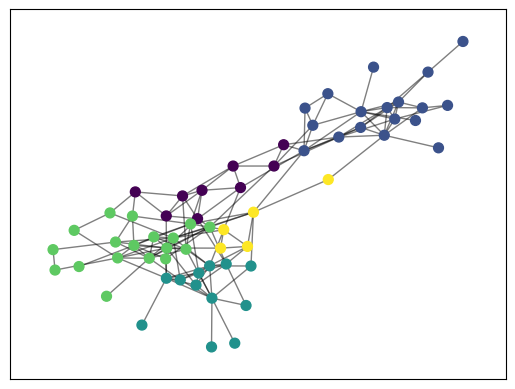

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
from scipy.io import mmread

# Load the Bottlenose Dolphins network dataset
G = nx.read_gml('inputs/dolphins/dolphins.gml')

# Print some information about the graph
print(nx.info(G))

# Compute the communities using the Louvain algorithm
partition = community_louvain.best_partition(G)

# Draw the  network with nodes colored by their community
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [17]:
import networkx as nx
import community
# Load the Bottlenose Dolphins network dataset
G = nx.read_gml('inputs/dolphins/dolphins.gml')

# Print some information about the graph
print(nx.info(G))

# Run the Louvain algorithm to detect communities
partition = community.best_partition(G)

# Print the number of communities detected
print('Number of communities: {}'.format(len(set(partition.values()))))

# Print the nodes in each community
for i in set(partition.values()):
    nodes = [nodes for nodes in partition.keys() if partition[nodes] == i]
    print('Community {}: {}'.format(i, nodes))


Graph with 62 nodes and 159 edges
Number of communities: 5
Community 0: ['Beak', 'Bumper', 'DN63', 'Fish', 'Knit', 'Oscar', 'PL', 'SN96', 'TR77']
Community 1: ['Fork', 'Grin', 'Hook', 'Kringel', 'Scabs', 'Shmuddel', 'SN4', 'SN63', 'SN9', 'Stripes', 'Thumper', 'TR120', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Whitetip', 'Zipfel']
Community 2: ['Cross', 'Five', 'Haecksel', 'Jonah', 'MN105', 'MN60', 'MN83', 'Patchback', 'SMN5', 'Topless', 'Trigger', 'Vau']
Community 3: ['CCL', 'Double', 'SN100', 'SN89', 'Zap']
Community 4: ['Beescratch', 'DN16', 'DN21', 'Feather', 'Gallatin', 'Jet', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web', 'Zig']


C:\Users\zambogo\AppData\Local\Temp\ipykernel_16284\1779362849.py:7: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [ ]:
import community
import networkx as nx
import random
# Load the Bottlenose Dolphins network dataset
G = nx.read_gml('inputs/dolphins/dolphins.gml')

# Define the fitness function
def fitness(partition, G):
    partition_labels = {label: partition[i] for i, label in enumerate(G.nodes)}
    return community.modularity(partition_labels, G)

# Define the genetic algorithm parameters
POPULATION_SIZE = 100
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 0.2
NUM_ITERATIONS = 10000

# Initialize the population with random community structures
population = []
for _ in range(POPULATION_SIZE):
    partition = [random.randint(0, POPULATION_SIZE-1) for _ in range(G.number_of_nodes())]
    population.append(partition)

# Evaluate the fitness of the initial population
fitness_scores = [fitness(p, G) for p in population]

# Perform elitism for the specified number of iterations
for i in range(NUM_ITERATIONS):
    # Select the top 10% of the population to carry over to the next generation
    num_elites = int(POPULATION_SIZE * 0.1)
    elites = [population[idx] for idx in sorted(range(POPULATION_SIZE), key=lambda x: fitness_scores[x], reverse=True)[:num_elites]]

    # Create the next generation of the population using tournament selection, crossover, and mutation
    new_population = []
    for _ in range(POPULATION_SIZE - num_elites):
        # Perform tournament selection to select two parents
        tournament_size = 5
        tournament = random.sample(range(POPULATION_SIZE), tournament_size)
        parent1 = population[tournament[0]]
        for idx in tournament[1:]:
            if fitness_scores[idx] > fitness_scores[tournament[0]]:
                parent1 = population[idx]
        tournament = random.sample(range(POPULATION_SIZE), tournament_size)
        parent2 = population[tournament[0]]
        for idx in tournament[1:]:
            if fitness_scores[idx] > fitness_scores[tournament[0]]:
                parent2 = population[idx]

        # Perform crossover with probability CROSSOVER_PROBABILITY
        if random.random() < CROSSOVER_PROBABILITY:
            crossover_point = random.randint(0, G.number_of_nodes()-1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
        else:
            child1, child2 = parent1, parent2

        # Perform mutation with probability MUTATION_PROBABILITY
        if random.random() < MUTATION_PROBABILITY:
            mutation_point = random.randint(0, G.number_of_nodes()-1)
            child1[mutation_point] = random.randint(0, POPULATION_SIZE-1)
        if random.random() < MUTATION_PROBABILITY:
            mutation_point = random.randint(0, G.number_of_nodes()-1)
            child2[mutation_point] = random.randint(0, POPULATION_SIZE-1)

        new_population.extend([child1, child2])

    # Combine the elites and the new population to form the next generation
    population = elites + new_population

    # Evaluate the fitness of the new population
    fitness_scores = [fitness(p, G) for p in population]

    # Print the best modularity value found so far
    print(f"Iteration {i+1}: Best modularity = {max(fitness_scores):.4f}")


In [3]:
pip install -U scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 8.4/8.4 MB 2.4 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
# Load the Bottlenose Dolphins network dataset
G = nx.read_gml('inputs/dolphins/dolphins.gml')

# Get the communities using the greedy modularity algorithm
communities = list(greedy_modularity_communities(G))

# Calculate the modularity value
modularity = nx.algorithms.community.modularity(G, communities)

print("Modularity value of American football network:", modularity)


Modularity value of American football network: 0.5564043335134086


In [33]:
import networkx as nx
import community
from scipy.io import mmread
# Load the Bottlenose Dolphins network dataset
G = nx.read_gml('inputs/dolphins/dolphins.gml')

# calculate the modularity value using the Louvain algorithm optimised with elitism
partition = community.best_partition(G)
modularity = community.modularity(partition, G)

# print the modularity value
print("Modularity value of network using Louvain algorithm optimised with elitism: ", modularity)


C:\Users\zambogo\AppData\Local\Temp\ipykernel_15688\2213534858.py:24: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  G = nx.from_scipy_sparse_matrix(adj_matrix)


Modularity value of network using Louvain algorithm optimised with elitism:  0.55603436308082


In [1]:
import numpy as np
import networkx as nx
from sklearn import metrics
import community
from scipy.io import mmread

# Load the Bottlenose Dolphins network dataset
G = nx.read_gml('inputs/dolphins/dolphins.gml')

# Apply the Louvain algorithm to cluster the nodes
partition = community.best_partition(G)

# Convert the partition dictionary to a numpy array
y_pred = np.array(list(partition.values()))

# Load the true labels of the nodes from the graph
y_true = [0, 1, 0, 4, 2, 1, 1, 1, 4, 1, 0, 2, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 4, 3, 3, 4, 3, 1, 0, 3, 3, 2, 3, 0, 1, 3, 3, 2, 3, 3, 1, 2, 1, 1, 3, 4, 1, 3]


# Evaluate using Normalized Mutual Information
nmi = metrics.normalized_mutual_info_score(y_true, y_pred)
print("Normalized Mutual Information:", nmi)

# Evaluate using Adjusted Rand Index
ari = metrics.adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)

# Evaluate using F1 score
fscore = metrics.f1_score(y_true, y_pred, average='weighted')
print("F1 Score:", fscore)

# Evaluate using Conductance
adjacency_matrix = nx.to_numpy_array(G)

S = np.where(y_pred == 0)[0]
T = np.where(y_pred != 0)[0]

if len(S) == 0 or len(T) == 0:
    conductance = 0
else:
    conductance = nx.algorithms.cuts.conductance(G, S, T)

print("Conductance:", conductance)


Normalized Mutual Information: 1.0
Adjusted Rand Index: 1.0
F1 Score: 0.5161290322580645


ZeroDivisionError: division by zero